# Logistic Regression with NumPy

This script performs logistic regression using NumPy to predict the presence of firefighting facilities based on various features from a dataset. The script includes the following steps:

1. **Load and preprocess the data**: The data is loaded from a CSV file and split into features and target variables.
2. **Split the data**: The data is divided into training (85%) and testing (15%) sets.
3. **Train the logistic regression model**: Using gradient descent, the logistic regression model is trained.
4. **Evaluate the model**: The model's performance is assessed using accuracy, recall, precision, and F-measure (F1 score).
5. **Visualize the results**: The confusion matrix is visualized to provide insight into the model's predictions.


Cost after iteration 0: 0.9770741324220505
Cost after iteration 10000: 0.04154942997935975
Cost after iteration 20000: 0.020880212670548456
Cost after iteration 30000: 0.013889648887522636
Cost after iteration 40000: 0.010396566856075344
Cost after iteration 50000: 0.008305149787125795
Cost after iteration 60000: 0.00691370215953181
Cost after iteration 70000: 0.005921521471531716
Cost after iteration 80000: 0.005178443487014843
Cost after iteration 90000: 0.004601170382199426
Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F-measure: 100.00%
Confusion Matrix:
[[3 0]
 [0 2]]


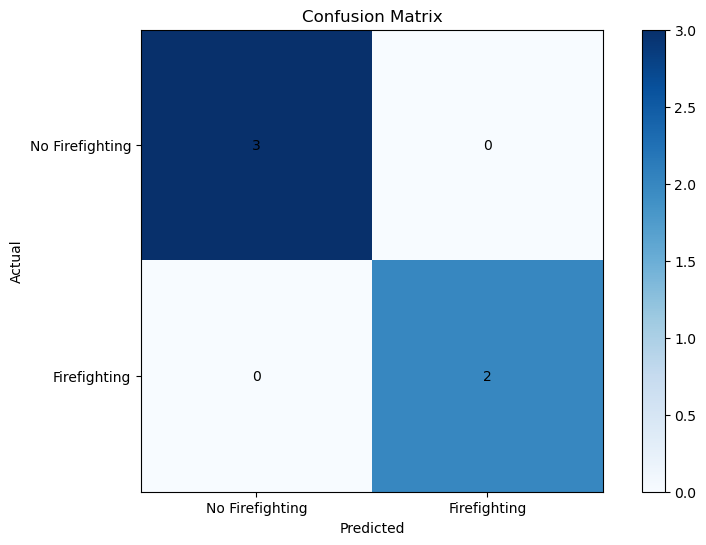

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'prices.txt'
data = np.loadtxt(file_path, delimiter=',')

# Split the data into features (X) and target (y)
# The last column is assumed to be the feature for predictions
X = data[:, :-1]
# The second to last column is the target variable indicating firefighting presence
y = data[:, -2].astype(int)

# Add a bias term (column of ones) to the feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the data into training (85%) and testing (15%) sets
split_index = int(0.85 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize weights for the logistic regression model
weights = np.zeros(X_train.shape[1])

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic regression cost function
def cost_function(X, y, weights):
    z = np.dot(X, weights)
    h = sigmoid(z)
    cost = -y * np.log(h) - (1 - y) * np.log(1 - h)
    return cost.mean()

# Define the gradient descent function
def gradient_descent(X, y, weights, learning_rate, iterations):
    for i in range(iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= learning_rate * gradient
        # Print cost every 10000 iterations for tracking
        if i % 10000 == 0:
            print(f'Cost after iteration {i}: {cost_function(X, y, weights)}')
    return weights

# Train the logistic regression model
weights = gradient_descent(X_train, y_train, weights, learning_rate=0.01, iterations=100000)

# Define the predict function
def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5

# Evaluate the model
y_pred = predict(X_test, weights)

# Calculate accuracy, recall, precision, and F-measure
def calculate_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    f_measure = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return accuracy, recall, precision, f_measure

# Compute the metrics
accuracy, recall, precision, f_measure = calculate_metrics(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'F-measure: {f_measure * 100:.2f}%')

# Define the confusion matrix function
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TN, FP], [FN, TP]])

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['No Firefighting', 'Firefighting'])
plt.yticks([0, 1], ['No Firefighting', 'Firefighting'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Annotate the confusion matrix with values
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

# Show the plot
plt.show()
